# Customer Decision Making Model - Churn Model

# RANDOM FOREST

In [1]:
import pandas  as pd                                   #  For data handling
from sklearn.model_selection import train_test_split   #  To split train/test
from sklearn.tree import DecisionTreeClassifier        #  For DT
from sklearn.metrics import accuracy_score             #  Accuracy
from sklearn.metrics import confusion_matrix           #  confusion matrix
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt

In [109]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') #from kaggle 

<h1>Telco Dataset = Customers who left within the last month </h1>
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.<br>
<br>
<b>The data set includes information about:</b><br>

Customers who left within the last month – the column is called Churn<br>
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
Demographic info about customers – gender, age range, and if they have partners and dependents<br>

In [4]:
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

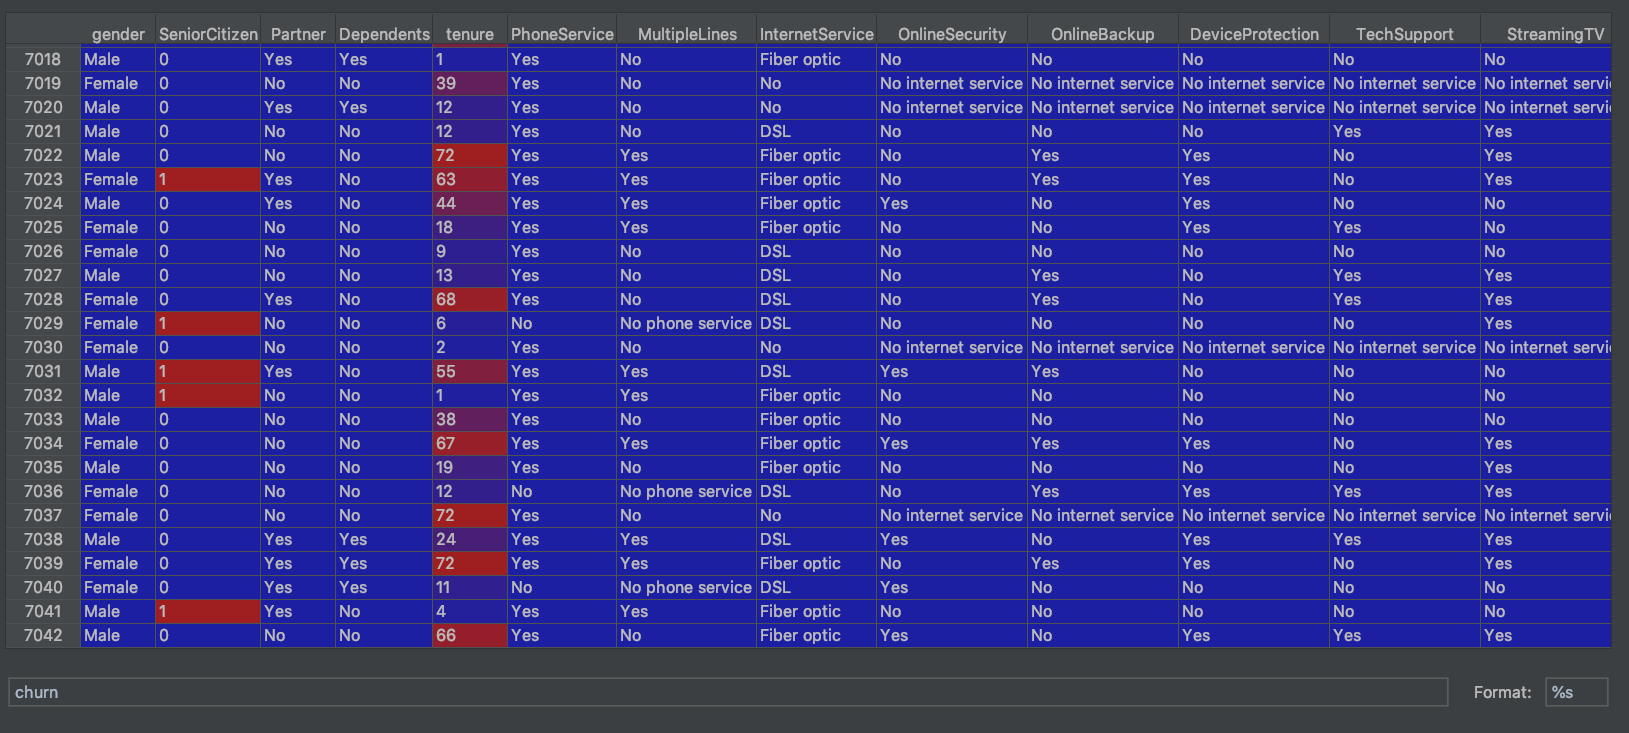

<h1>Explolatory Data Analysis

In [5]:
churn.shape

(7043, 21)

In [27]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [10]:
#checking the data types

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# WHY IS 19  TotalCharges      7043 non-null   object  not numeric

In [110]:
churn["TotalCharges"].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [18]:
#freq 11 ?? Missing values maybe

In [17]:
churn["MonthlyCharges"].describe() #continous variables look like this

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [19]:
churn["PaymentMethod"].describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [21]:
#freq 2365 this is how it should look

<h2> There are 11 empty entries in Total Charges  and its a string

In [23]:
churn["TotalCharges"].isna().sum()

0

In [26]:
(churn["TotalCharges"]==" ").sum()

11

# Visualizing the data

In [89]:
import matplotlib.pyplot as plt   # For plotting graphs
import matplotlib.ticker as mtick # For specifying axes ticks
import seaborn           as sns   # For interactive plots
import os

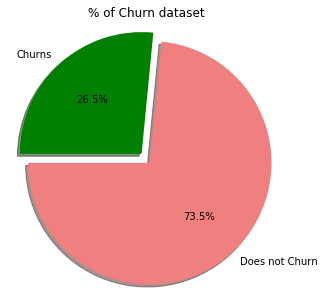

In [123]:
sizes   = churn['Churn'].value_counts(sort = True)
labels  = 'Does not Churn', 'Churns'
colors  = ['lightcoral', 'green']
explode = (0.1, 0)  # explode Churns



fig     = plt.figure(figsize =(5,5))
#plt.figure(figsize =(5,5))
plt.pie(sizes, 
        labels=labels, 
        colors=colors,
        explode=explode,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=-180)

plt.axis('equal')
plt.title('% of Churn dataset')
plt.grid()
plt.show()
#fig.savefig('Churn_pi-chart.pdf')

In [98]:
#Tenure Relationship to Churn

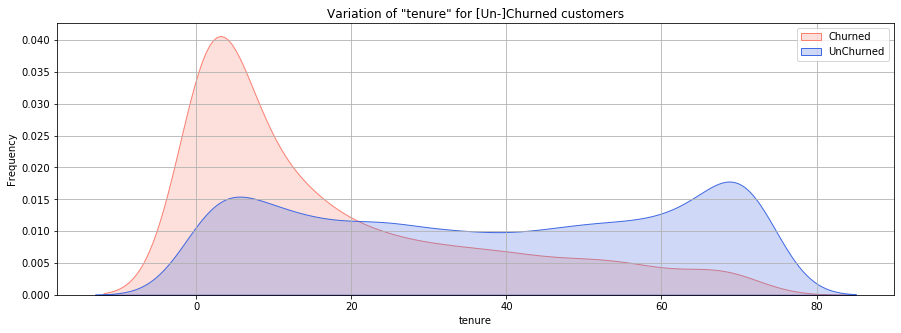

In [94]:
fig= plt.figure(figsize= (15,5))
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'Yes') ], 
                color="salmon", shade = True)
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'No') ], 
                ax=ax, color="royalblue", shade= True)

ax.set_xlabel("tenure")
ax.set_ylabel("Frequency")
plt.title('Variation of "tenure" for [Un-]Churned customers')
plt.grid()
ax = ax.legend(["Churned","UnChurned"])
#fig.savefig('Churn_tenure_density-plot.pdf')

In [96]:
#Mothly Chargers Relationship to Churn

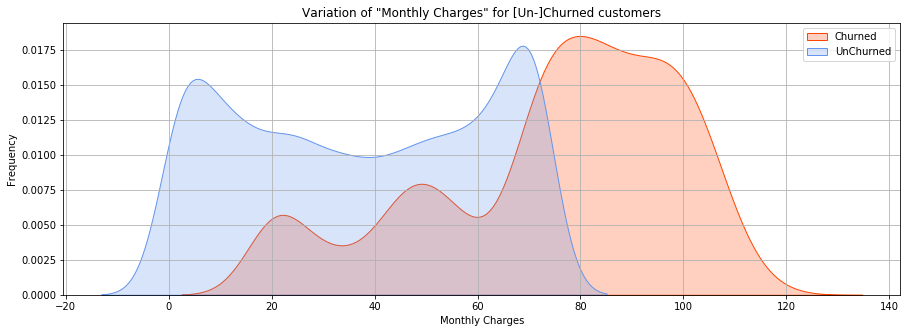

In [97]:
fig= plt.figure(figsize= (15,5))
ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'Yes') ], 
                color="orangered", shade = True)
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'No') ], 
                ax=ax, color="cornflowerblue", shade= True)
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Frequency")
plt.title('Variation of "Monthly Charges" for [Un-]Churned customers')
ax = ax.legend(["Churned","UnChurned"])
plt.grid()
#fig.savefig('Churn_MnthlyChrgs_density-plot.pdf')

In [99]:
#Total Charges Relationship to Churn

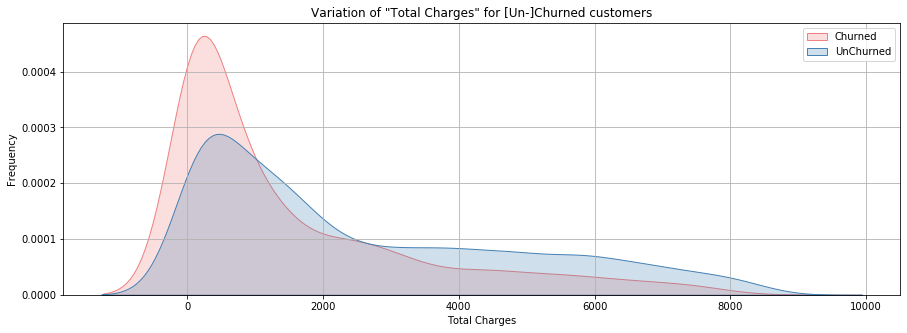

In [116]:
fig= plt.figure(figsize= (15,5))
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'Yes') ], 
                color="lightcoral", shade = True)
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'No') ], 
                ax=ax, color="steelblue", shade= True)
ax.set_xlabel("Total Charges")
ax.set_ylabel("Frequency")
plt.title('Variation of "Total Charges" for [Un-]Churned customers')
ax = ax.legend(["Churned","UnChurned"])
plt.grid()
#fig.savefig('Churn_TotalChrgs_density-plot.pdf')

In [130]:
churn["TotalCharges"][churn["Churn"]=="Yes"].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

In [117]:
#relationship if Senior Citizen

<Figure size 1080x360 with 0 Axes>

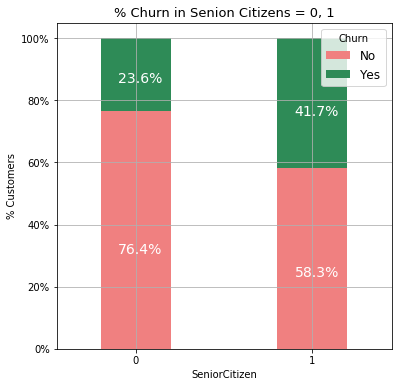

In [122]:
colors = ['lightcoral','seagreen']
churn_sczn = churn.groupby(['SeniorCitizen','Churn']).size().unstack()
fig= plt.figure(figsize= (15,5))

ax = (churn_sczn.T*100.0/ 
      churn_sczn.T.sum()).T.plot(kind='bar',
                                 width = 0.4,
                                 stacked = True,
                                 rot = 0, 
                                 figsize = (6,6),
                                 color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='upper right',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('% Churn in Senion Citizens = 0, 1',size = 13)

# Add data labels to the bar diagram
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), 
                (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'normal',
                size =14)
plt.grid()
#fig.savefig('Churn_Sen-Cit_stacked-bar.pdf')

<H1> Take aways

<b> Only 26% Customers are churning<br>
Customers with low tenure are churning <br>
Customers more than Dollar 80 Monthly Charge are churning <br>
Total charges that churn are around Dollar 1500 <br>
Senior Citizons are churning at double compared to non senior<br> </b>

In [132]:
churn["TotalCharges"][churn["Churn"]=="Yes"].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

# Check for Imbalance Data

In [28]:
churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

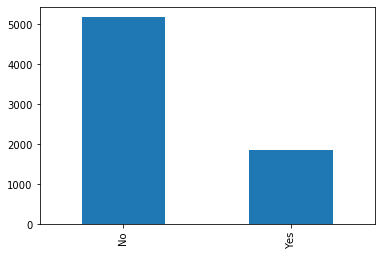

In [36]:
churn["Churn"].value_counts().plot(kind="bar")

In [39]:
dist=churn["Churn"].value_counts()

In [42]:
ratio = dist / dist.sum()
ratio

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [43]:
#kind of ok not extreme 

In [112]:
churn["TotalCharges"]=churn["TotalCharges"].replace(" ",0)
churn["TotalCharges"]=churn["TotalCharges"].astype(float)

In [113]:
churn["TotalCharges"].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

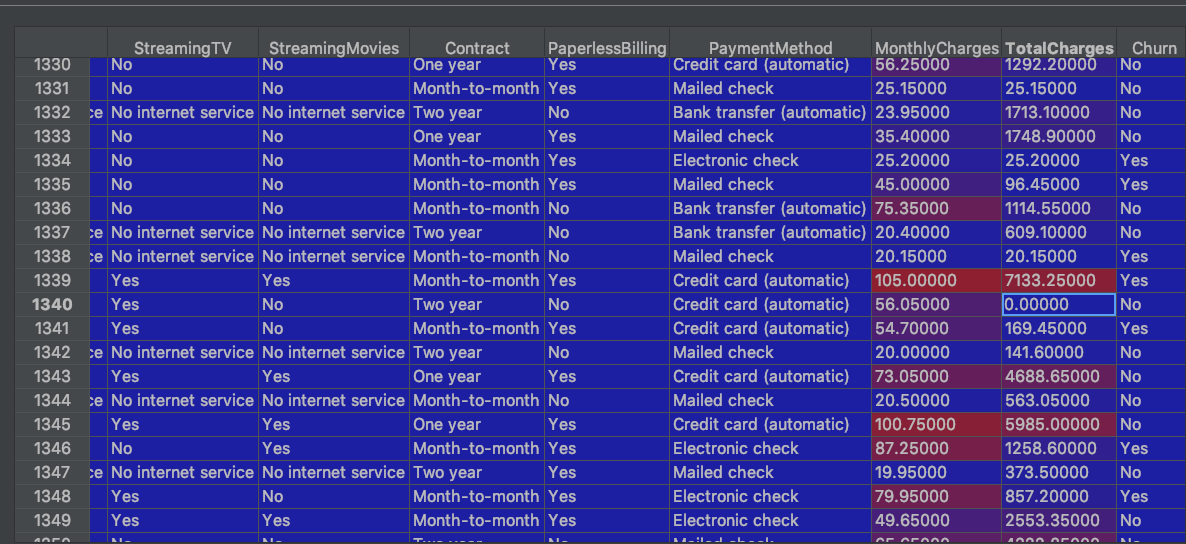

In [52]:
churn["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

# Categorical Data

In [55]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
churn["gender"].replace({'Male': 0, 'Female': 1})

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [53]:
churn["gender"].map({'Male': 0, 'Female': 1})

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [ ]:
#create another DF

In [142]:
churnum = churn.copy()

In [143]:
map_num = {"gender":           {"Male":1, "Female": 0},
           "Partner":          {"Yes": 1,  "No": 0},
           "Dependents":       {"Yes": 1,  "No": 0},
           "PhoneService":     {"Yes": 1,  "No": 0},
           "MultipleLines":    {"Yes": 2,  "No": 1, "No phone service": 0},
           "InternetService":  {"Fiber optic"  : 2,   "DSL": 1,   "No": 0},
           "OnlineSecurity":   {"Yes": 2,  "No": 1, "No internet service": 0},
           "OnlineBackup":     {"Yes": 2,  "No": 1, "No internet service": 0},
           "DeviceProtection": {"Yes": 2,  "No": 1, "No internet service": 0},
           "TechSupport":      {"Yes": 2,  "No": 1, "No internet service": 0},
           "StreamingTV":      {"Yes": 2,  "No": 1, "No internet service": 0},
           "StreamingMovies":  {"Yes": 2,  "No": 1, "No internet service": 0},
           "Contract":         {"Month-to-month": 1,
                                "One year"      : 12,
                                "Two year"      : 24},
           "PaperlessBilling": {"Yes": 1,  "No": 0},
           "PaymentMethod":    {"Electronic check"          : 1,
                                "Mailed check"              : 0,
                                "Bank transfer (automatic)" : 2,
                                "Credit card (automatic)"   : 3},
           "Churn":            {"Yes": 1,  "No": 0}
          }

In [144]:
churnum.replace(map_num, inplace=True)

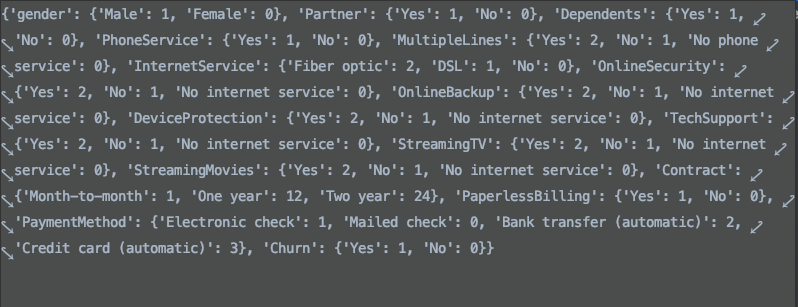

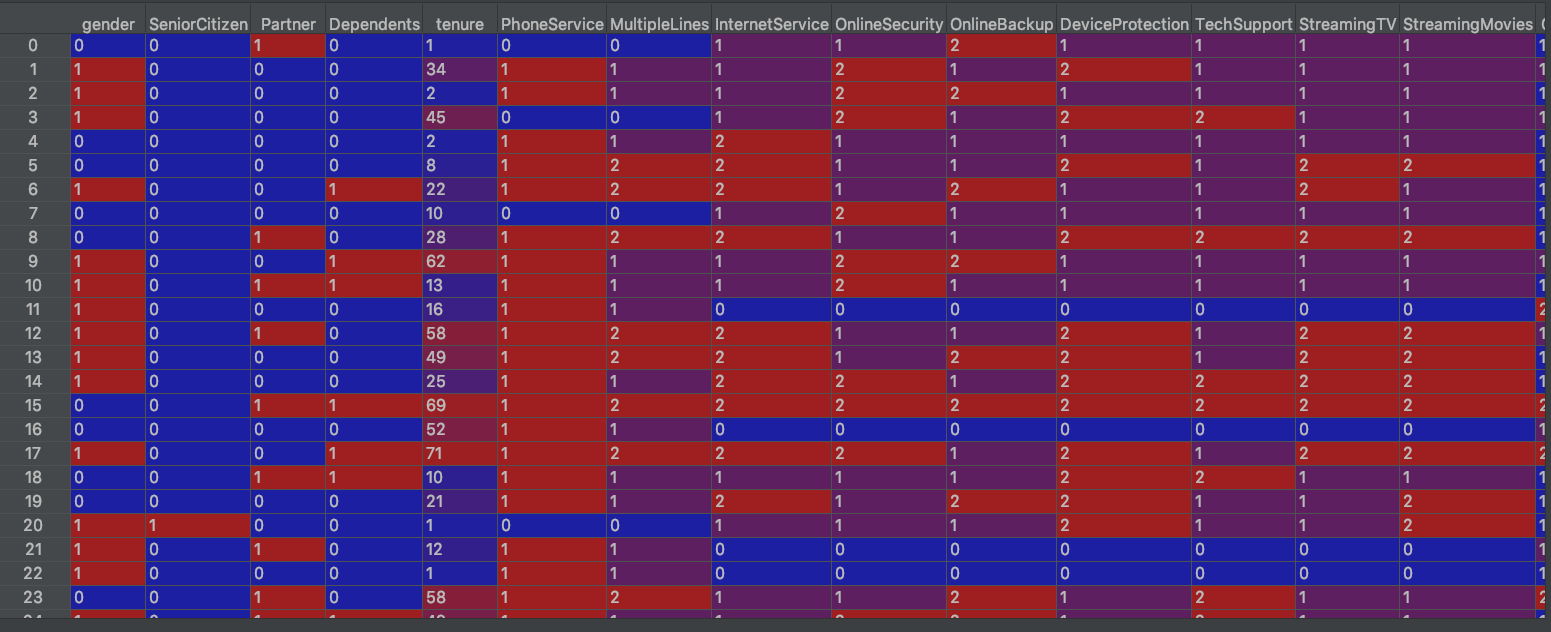

In [145]:
churnum=churnum.drop(columns="customerID")

In [146]:
churnum

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               1             2   
1                 1                1               2             1   
2                 1                1               2             2   
3                 0                1               2             1   
4                 1                2               1             1   
...             ...              ...             ...           ...   
7038              2                1               2             1   
7039              2                2               1             2   
7040              0                1               2             1   
7041              2                2               1             1   
7042              1                2               2             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    1            1            1                1         1   
1                    2            1            1                1        12   
2                    1            1            1                1         1   
3                    2            2            1                1        12   
4                    1            1            1                1         1   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2        12   
7039                 2            1            2                2        12   
7040                 1            1            1                1         1   
7041                 1            1            1                1         1   
7042                 2            2            2                2        24   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              1           29.85         29.85      0  
1                    0              0           56.95       1889.50      0  
2                    1              0           53.85        108.15      1  
3                    0              2           42.30       1840.75      0  
4                    1              1           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              0           84.80       1990.50      0  
7039                 1              3          103.20       7362.90      0  
7040                 1              1           29.60        346.45      0  
7041                 1              0           74.40        306.60      1  
7042                 1              2          105.65       6844.50      0  

[7043 rows x 20 columns]

# Train Test Split

In [147]:
churnum.shape

(7043, 20)

In [148]:
X=churnum.values[:,:19]
y=churnum.values[:,19]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 39)

# BUILDING THE MODEL

<b> READING REFERENCE https://towardsdatascience.com/decision-tree-fundamentals-388f57a60d2a

<b> Gini Impurity<br></b>
Gini impurity is the lost function being used in the CART method. Gini Impurity measures how much noise a category has. For starters, each data feature may consist of many categories. For example, the weather feature can have categories: rain, sunny, or snowy; a numerical feature such as grade can be divide into 2 blocks: <70 or ≥70. Gini impurity can be calculated by the following formula:

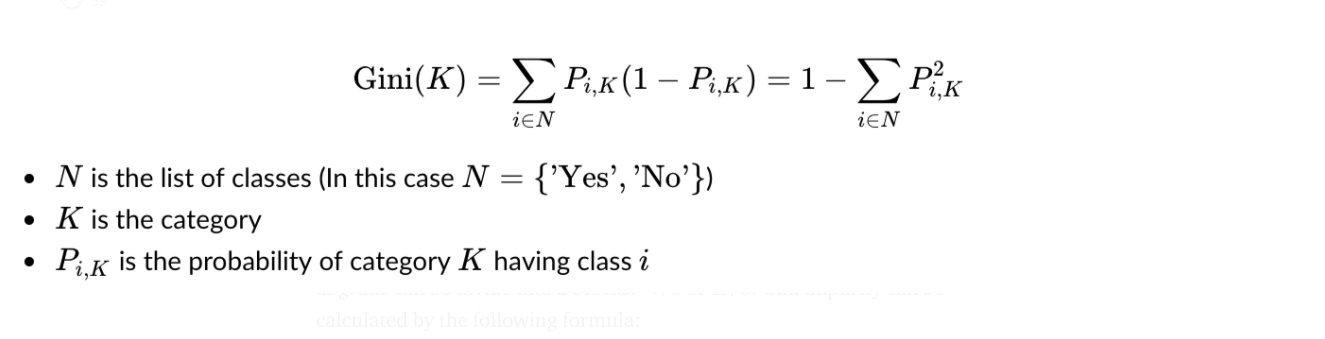

<b> Entropy<br></b>

In physics, entropy represents the unpredictability of a random variable. The chance of having Head or Tail from a fair coin is 50/50, and so its entropy value is 1, which is the highest value for randomness. On the other hand, having a value 0 indicates the corresponding event is destined. Entropy is similar to Gini Impurity in the sense that they both indicate the unpredictability of the category. The formula for entropy is:

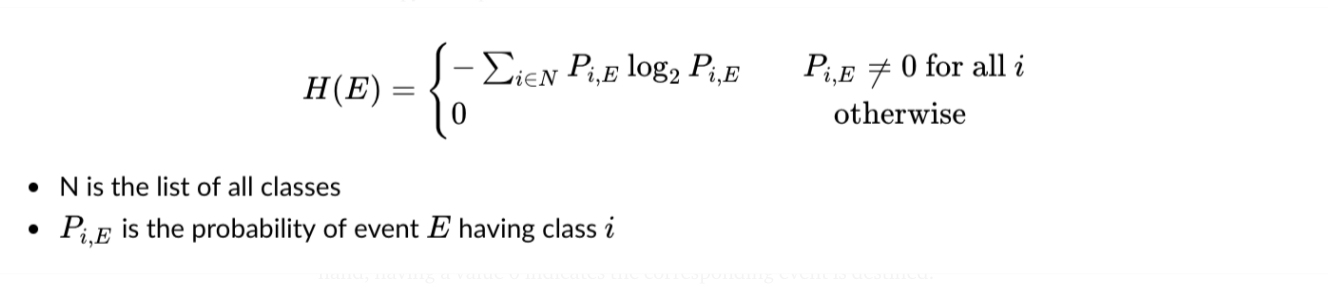

### Asumption is charges more than 80 churn, less than 80 do not churn

In [211]:
tree_depth =5

In [212]:
dtc =DecisionTreeClassifier(
criterion="gini",
    random_state=39,
    max_depth=tree_depth, 
    min_samples_leaf=50 # this is the threshold of samples needed to create ant rule
)

In [213]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=39)

In [214]:
y_pren_dt = dtc.predict(X_train)
y_pret_dt = dtc.predict(X_test)

In [215]:
model_dt = DecisionTreeClassifier(criterion = "gini", 
                                      random_state = 39,
                                      max_depth = tree_depth, 
                                      min_samples_leaf = 50)
model_dt.fit(X_train, y_train)
    
    ##  Predict  on  training  &  test  data sets
    
y_pren_dt = model_dt.predict(X_train)
y_pret_dt = model_dt.predict(X_test)

In [170]:
confusion_matrix(y_train, y_pren_dt)#train

array([[3792,  347],
       [ 710,  785]])

In [179]:
metrics.roc_curve(y_test, y_pret_dt)[:2]

(array([0.        , 0.09178744, 1.        ]),
 array([0.        , 0.48128342, 1.        ]))

In [171]:
confusion_matrix(y_test,y_pret_dt)#test

array([[940,  95],
       [194, 180]])

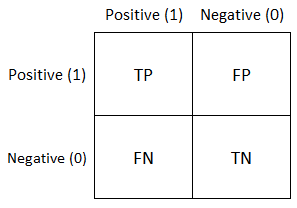

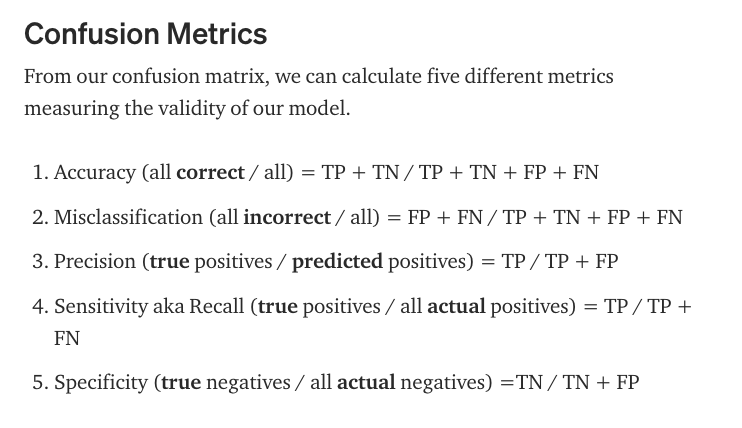

# Search for Best Depth of Tree

In [200]:
print("TEST SET METRICS")
for tree_depth in range(2, 15):
    
    model_dt = DecisionTreeClassifier(criterion = "gini", 
                                      random_state = 39,
                                      max_depth = tree_depth, 
                                      min_samples_leaf = 50)
    model_dt.fit(X_train, y_train)
    

    
    y_pren_dt = model_dt.predict(X_train)
    y_pret_dt = model_dt.predict(X_test)
    
    
    #Test Set metrics
    cm_dt = confusion_matrix(y_test, y_pret_dt)
    
    sens_dt = float(cm_dt[0,0])/(cm_dt[0,0]+cm_dt[0,1])
    spec_dt = float(cm_dt[1,1])/(cm_dt[1,0]+cm_dt[1,1])
    
    fpr, tpr, thsld = metrics.roc_curve(y_test, y_pret_dt, pos_label=1)
        
  
    print(tree_depth, "ACCURACY ",round(accuracy_score(y_test, y_pret_dt)*100, 2), \
          "SENSITIVITY ",round(sens_dt*100, 2),"SPECIFICITY ", round(spec_dt*100, 2), \
          "AUC",round(metrics.auc(fpr, tpr)*100, 2))

TEST SET METRICS
2 ACCURACY  75.37 SENSITIVITY  80.68 SPECIFICITY  60.7 AUC 70.69
3 ACCURACY  79.7 SENSITIVITY  93.82 SPECIFICITY  40.64 AUC 67.23
4 ACCURACY  79.63 SENSITIVITY  89.86 SPECIFICITY  51.34 AUC 70.6
5 ACCURACY  77.86 SENSITIVITY  84.54 SPECIFICITY  59.36 AUC 71.95
6 ACCURACY  79.56 SENSITIVITY  88.6 SPECIFICITY  54.55 AUC 71.57
7 ACCURACY  80.34 SENSITIVITY  91.21 SPECIFICITY  50.27 AUC 70.74
8 ACCURACY  79.99 SENSITIVITY  90.43 SPECIFICITY  51.07 AUC 70.75
9 ACCURACY  79.49 SENSITIVITY  90.82 SPECIFICITY  48.13 AUC 69.47
10 ACCURACY  79.49 SENSITIVITY  90.82 SPECIFICITY  48.13 AUC 69.47
11 ACCURACY  79.49 SENSITIVITY  90.82 SPECIFICITY  48.13 AUC 69.47
12 ACCURACY  79.49 SENSITIVITY  90.82 SPECIFICITY  48.13 AUC 69.47
13 ACCURACY  79.49 SENSITIVITY  90.82 SPECIFICITY  48.13 AUC 69.47
14 ACCURACY  79.49 SENSITIVITY  90.82 SPECIFICITY  48.13 AUC 69.47


In [194]:
# this is best 7 depth ACCURACY  80.34 SENSITIVITY  91.21 SPECIFICITY  50.27 AUC 70.74

In [201]:
print("TRAIN SET METRICS")
for tree_depth in range(2, 15):
    
    model_dt = DecisionTreeClassifier(criterion = "gini", 
                                      random_state = 39,
                                      max_depth = tree_depth, 
                                      min_samples_leaf = 50)
    model_dt.fit(X_train, y_train)
    

    
    y_pren_dt = model_dt.predict(X_train)
    y_pret_dt = model_dt.predict(X_test)
    
    
    #TRAIN Set metrics
    cm_dt = confusion_matrix(y_train, y_pren_dt)
    
    sens_dt = float(cm_dt[0,0])/(cm_dt[0,0]+cm_dt[0,1])
    spec_dt = float(cm_dt[1,1])/(cm_dt[1,0]+cm_dt[1,1])
    
    fpr, tpr, thsld = metrics.roc_curve(y_train, y_pren_dt, pos_label=1)
        
    print(tree_depth, "ACCURACY ",round(accuracy_score(y_train, y_pren_dt)*100, 2), \
          "SENSITIVITY ",round(sens_dt*100, 2),"SPECIFICITY ", round(spec_dt*100, 2), \
          "AUC",round(metrics.auc(fpr, tpr)*100, 2))

TRAIN SET METRICS
2 ACCURACY  76.46 SENSITIVITY  81.49 SPECIFICITY  62.54 AUC 72.02
3 ACCURACY  78.97 SENSITIVITY  93.84 SPECIFICITY  37.79 AUC 65.82
4 ACCURACY  79.29 SENSITIVITY  89.95 SPECIFICITY  49.77 AUC 69.86
5 ACCURACY  79.8 SENSITIVITY  86.11 SPECIFICITY  62.34 AUC 74.22
6 ACCURACY  80.64 SENSITIVITY  89.37 SPECIFICITY  56.45 AUC 72.91
7 ACCURACY  80.95 SENSITIVITY  91.54 SPECIFICITY  51.64 AUC 71.59
8 ACCURACY  81.22 SENSITIVITY  90.99 SPECIFICITY  54.18 AUC 72.58
9 ACCURACY  81.24 SENSITIVITY  91.62 SPECIFICITY  52.51 AUC 72.06
10 ACCURACY  81.24 SENSITIVITY  91.62 SPECIFICITY  52.51 AUC 72.06
11 ACCURACY  81.24 SENSITIVITY  91.62 SPECIFICITY  52.51 AUC 72.06
12 ACCURACY  81.24 SENSITIVITY  91.62 SPECIFICITY  52.51 AUC 72.06
13 ACCURACY  81.24 SENSITIVITY  91.62 SPECIFICITY  52.51 AUC 72.06
14 ACCURACY  81.24 SENSITIVITY  91.62 SPECIFICITY  52.51 AUC 72.06


In [198]:
# 5 ACCURACY  79.8 SENSITIVITY  86.11 SPECIFICITY  62.34 AUC 74.22

# Visualize the tree

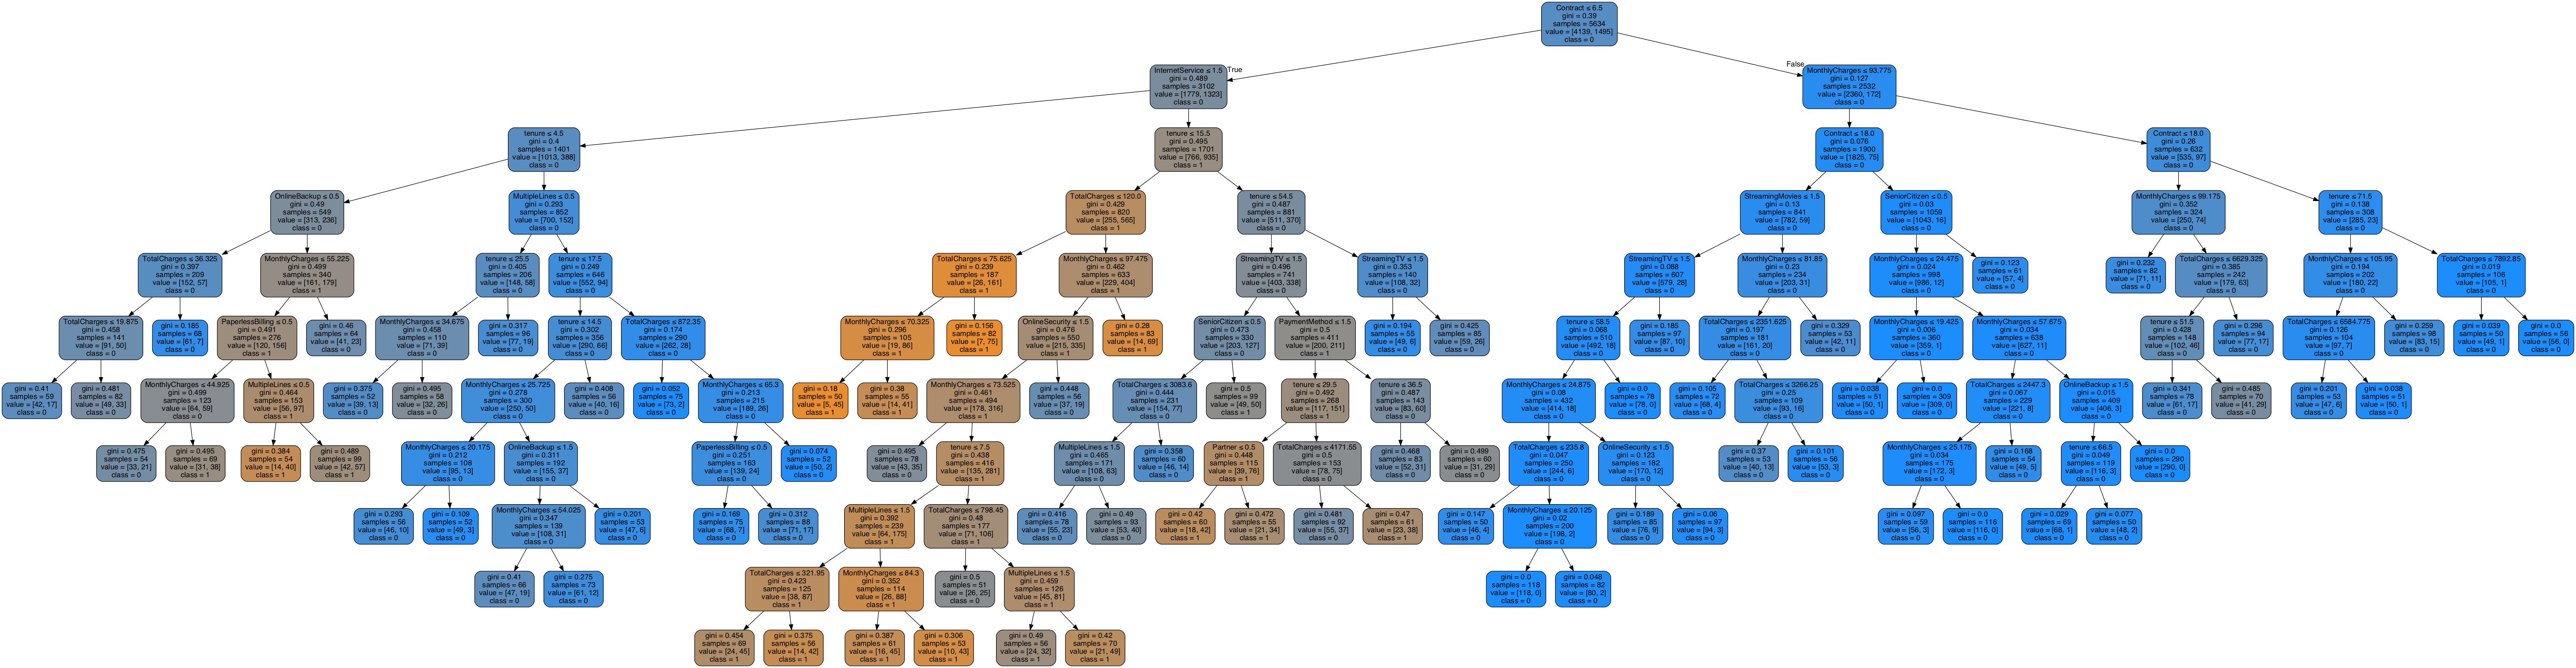

In [210]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus   


dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                
                filled=True, 
                
                rounded=True,
                special_characters=True,
                
                
                feature_names = list(churnum.iloc[:, :19]), # name of colums
                
                class_names=['0','1']) # churn not churn classes

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label(). \
                  split('value = [')[1].split(']')[0].split(',')]
        
        values = [int(255 * v / sum(values)) for v in values]
        
        #  make colors 50% lighter
        tt = 0.9
        rr = 255 - int((255 - values[1])*tt) # YES CHURNED color
        gg = 255 - int((255 - 128)*tt)
        bb = 255 - int((255 - values[0])*tt) # NOT CHURN
        color = '#{:02x}{:02x}{:02x}'.format(rr, gg, bb)
        
        node.set_fillcolor(color)

graph.write_pdf('churn_Tree.pdf')

Image(graph.create_png())


# WARM COLORS ARE FOR CHURNS

# Mapping the rules

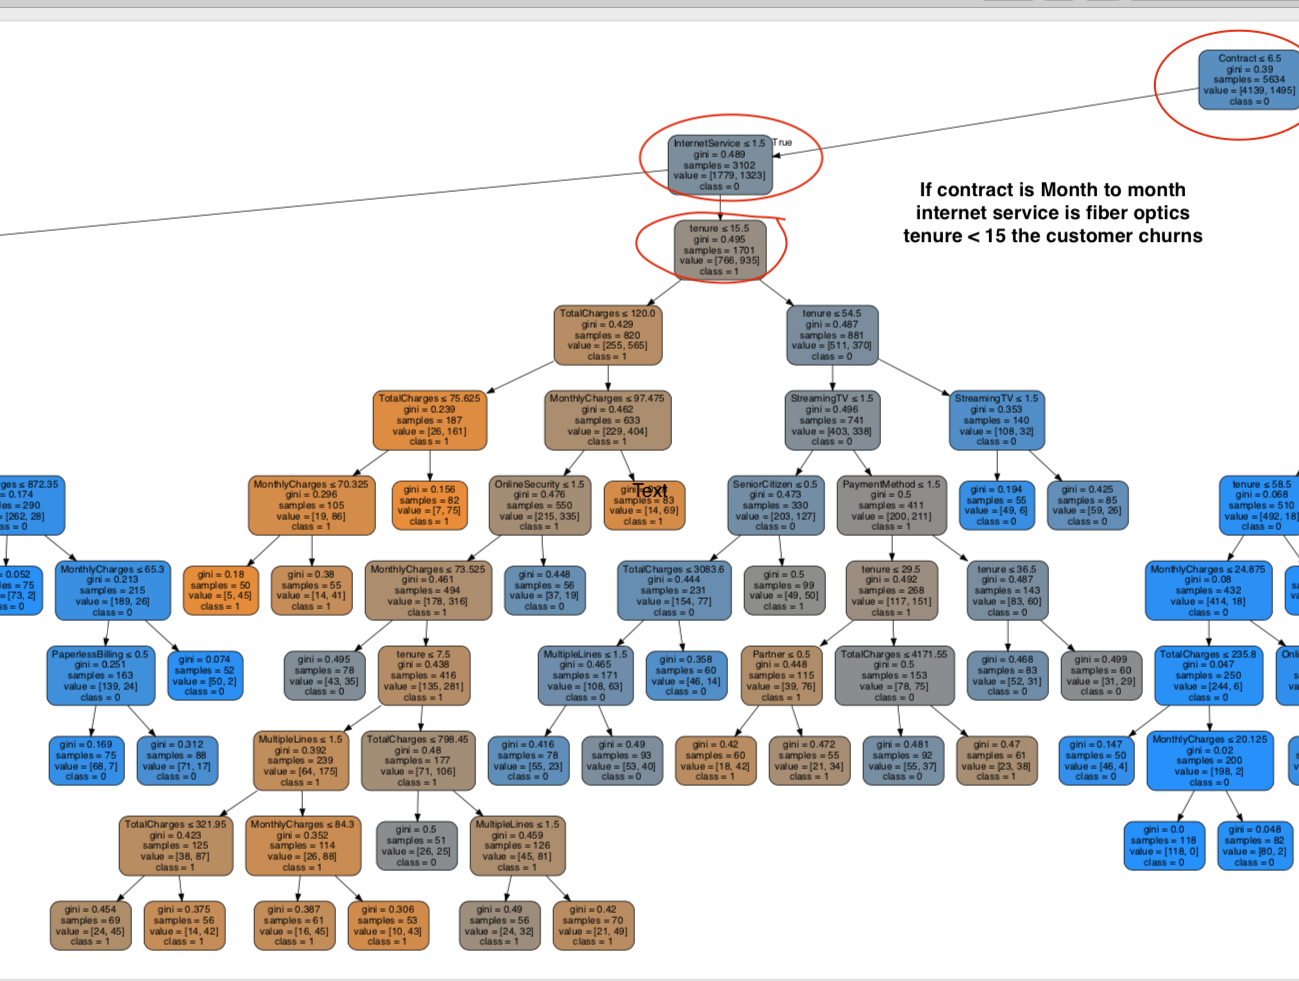

# LETS GET MORE RULES by changing the depth of tree to 5

In [216]:
# I made depth = 5

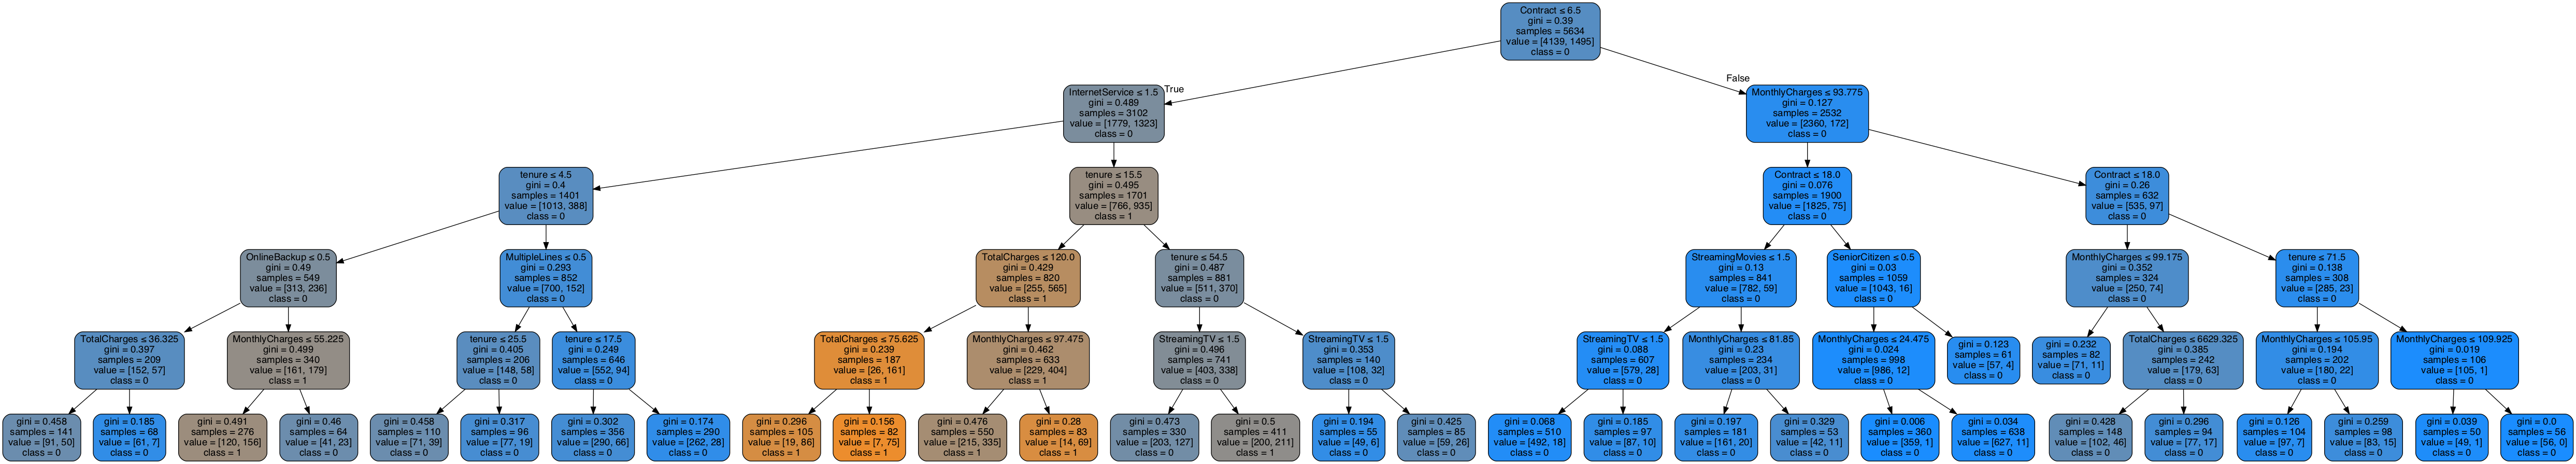

In [217]:
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                
                filled=True, 
                
                rounded=True,
                special_characters=True,
                
                
                feature_names = list(churnum.iloc[:, :19]), # name of colums
                
                class_names=['0','1']) # churn not churn classes

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label(). \
                  split('value = [')[1].split(']')[0].split(',')]
        
        values = [int(255 * v / sum(values)) for v in values]
        
        #  make colors 50% lighter
        tt = 0.9
        rr = 255 - int((255 - values[1])*tt) # YES CHURNED color
        gg = 255 - int((255 - 128)*tt)
        bb = 255 - int((255 - values[0])*tt) # NOT CHURN
        color = '#{:02x}{:02x}{:02x}'.format(rr, gg, bb)
        
        node.set_fillcolor(color)

graph.write_pdf('churn_Tree_5.pdf') # depth 5

Image(graph.create_png())


# MORE RULES

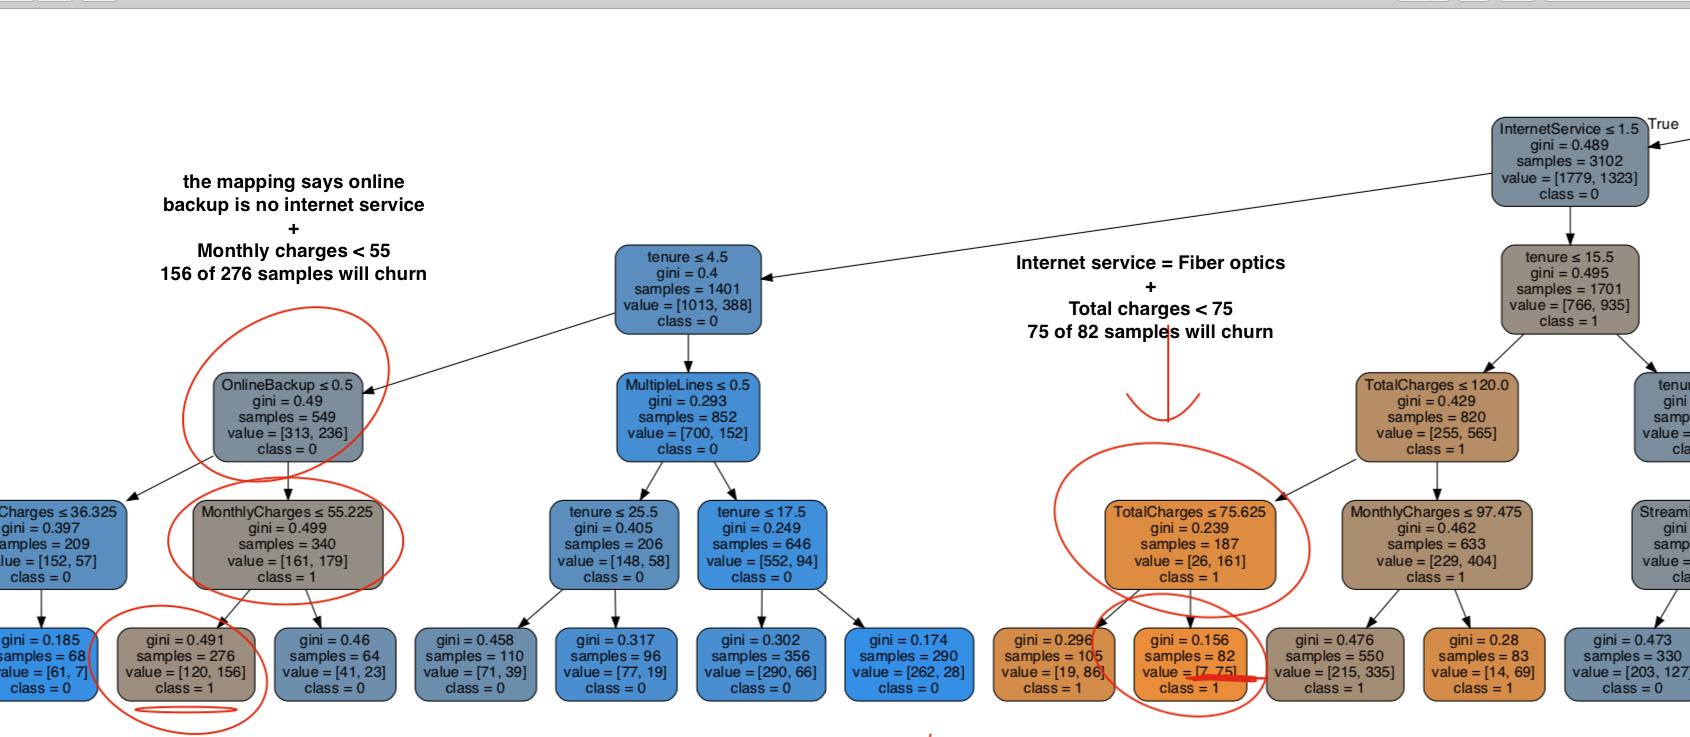

# CONCLUSION

<h2>Customer Decision Rules <br></h2>

<b> Rule 1</b> <br>
If contract  = <b>Month to Month</b>  + Internet Service =<b> Fiber Optics</b>  +  <b> Tenure < 15.5 </b> Then Churn <br>

<br>
<b> Rule 2 </b>  <br>
If contract  = <b>Month to Month</b> + Internet Service = <b>Fiber Optics</b> + <b>Tenure < 15.5 </b> +  <b> Total Charges < 120</b>   Then Churn <br>
<br>

<b> Rule 3 </b>  <br>
If contract  = <b>Month to Month</b> + Internet Service = <b>Fiber Optics</b> + <b>Tenure < 15.5 </b> + <b> Total Charges > 120</b> AND <b> Monthly charges >97</b>  Then Churn <br>


<b> Rule 4 </b>  <br>
If contract  = <b>Month to Month</b> + <b>Internet Service = NO</b> and <b> tenure <4.5 and Monthly Charges <55 </b> then Churn <br>

<br>
